# FINAL PROJECT 
#### Data Analysis Bike Sharing Datasheet
- Nama: Bima Aristo
- Email: bimaaristo11@gmail.com
- Id Dicoding: bimaaristo

## Menentukan Pertanyaan Bisnis (Business Questions)

- Apakah ada tren atau perbedaan yang signifikan dalam peminjaman sepeda setiap tahunnya dari tahun 2011 hingga 2012? 
- Bagaimana kondisi cuaca cerah hingga buruk memengaruhi jumlah orang dalam meminjam sepeda?
- Apakah perbedaan musim memberikan pengaruh yang signifikan terhadap peminjam sepeda ditinjau dari (casual customer dan registered customer)?
- Apakah terdapat korelasi antara suhu dan jumlah orang yang melakukan peminjaman sepeda?


## Menyaipkan semua library yang dibuthkan (Prepare the Libraries)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Data Wrangling

### Gathering Data

##### gather the data of day.csv and hr.csv

In [2]:
day = pd.read_csv("day.csv", delimiter=",")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour = pd.read_csv("hour.csv", delimiter=",")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### check the data of day and hour

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ",day.duplicated().sum())
day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi: ",hour.duplicated().sum())
hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

##### Menghapus data yang tidak ada korelasinya dengan pertanyaan bisnis
1. Menghapus tabel hour: tidak dipertanyakan
2. Menghapus kolom windspeed dan instant: tidak dipertanyakan

##### Mengubah tulisan pada kolom agar lebih jelas dan mudah dimengerti
1. Mengubah "dteday" menjadi "daydate" 
2. Mengubah "yr" menjadi "year"
3. Mengubah "mnth" menjadi "month"
4. Mengubah "weathersit" menjadi "weathercondition"
5. Mengubah "cnt" menjadi "count"

In [10]:
del hour

In [11]:
drop_col = ['instant','windspeed']

for i in drop_col:
    if i in drop_col:
        day.drop(labels = i, axis=1, inplace=True)

day.head()   

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [12]:
day.rename(columns={
    'dteday': 'daydate',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weathercondition',
    'cnt': 'count'
}, inplace=True)

day.head()

,daydate,season,year,month,holiday,weekday,workingday,weathercondition,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


##### Konsistensi Pemberian Label pada Kondisi Cuaca, Musim, Bulan, dan Hari
1. Mengubah Keterangan Kondisi Cuaca pada Setiap Situasi
2. Mengubah Keterangan Musim
3. Mengubah Keterangan Bulan
4. Mengubah Keterangan Hari

##### Mengubah Kategori dan Tipe Data
1. Mengubah tipe data (weathercondition, season, year, month, day, weekday, workingday, holiday, dan workingday) menjadi 'category' data type
2. Mengubah tipe data daydate menjadi 'datetime' data type 

In [13]:
day['weathercondition'] = day['weathercondition'].map({
    1: 'Clear',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Tunderstorm/Fog Snow'
})
day['season'] = day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day ['month'] = day['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})
day['weekday'] = day['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
day['holiday'] = day ['holiday'].map({
    0:'Not_Holiday', 1:'Holiday'
})
day['workingday'] = day['workingday'].map({
    0:'Not_Working', 1:'Working'
})
day['year'] = day['year'].map ({
    0:'2011', 1:'2012'
})

In [14]:
# 1. Mengubah tipe data menjadi 'kategori'
day['season'] = day.season.astype('category')
day['year'] = day.year.astype('category')
day['month'] = day.month.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['weathercondition'] = day.weathercondition.astype('category')

# 2. Mengubah tipe data menjadi 'datetime'
day['daydate'] = pd.to_datetime(day.daydate)

# menampilkan hasil perubahan (top 5)
day.head()

,daydate,season,year,month,holiday,weekday,workingday,weathercondition,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,2011,January,Not_Holiday,Saturday,Not_Working,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,January,Not_Holiday,Sunday,Not_Working,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,January,Not_Holiday,Monday,Working,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,January,Not_Holiday,Tuesday,Working,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,January,Not_Holiday,Wednesday,Working,Clear,0.226957,0.229270,0.436957,82,1518,1600


In [15]:
#cek update tipe data yang sudah dibuat
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   daydate           731 non-null    datetime64[ns]
 1   season            731 non-null    object        
 2   year              731 non-null    category      
 3   month             731 non-null    category      
 4   holiday           731 non-null    category      
 5   weekday           731 non-null    category      
 6   workingday        731 non-null    category      
 7   weathercondition  731 non-null    category      
 8   temp              731 non-null    float64       
 9   atemp             731 non-null    float64       
 10  hum               731 non-null    float64       
 11  casual            731 non-null    int64         
 12  registered        731 non-null    int64         
 13  count             731 non-null    int64         
dtypes: category(6), datetime64

## Exploratory Data Analysis (EDA)

#### Explore Data 'day' yang Telah Diperbarui
1. Kelompokkan max, min, dan mean penyewa sepeda terhadap kondisi cuaca
2. Kelompokkan max, min, dan mean penyewa sepeda per bulan
3. Kelompokkan max, min, dan mean penyewa berdasarkan hari libur atau tidak
4. Kelompokkan max, min, dan mean penyewa berdasarkan hari dalam satu minggu
5. Kelompokkan max, min, dan mean penyewa berdasarkan hari kerja (senin-jumat) atau tidak (sabtu-minggu)
6. Kelompokkan max, min, dan mean penyewa berdasarkan musim
7. Kelompokkan max, min, dan mean dari kondisi temperatur dan humidity tiap musimnya

In [16]:
# 1
day.groupby(by='weathercondition').agg({
    'count': ['max', 'min', 'mean', 'sum']
})
    

C:\Users\USER\AppData\Local\Temp\ipykernel_14380\4231412123.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by='weathercondition').agg({


count                           
                   max  min         mean      sum
weathercondition                                 
Clear             8714  431  4876.786177  2257952
Light Snow/Rain   4639   22  1803.285714    37869
Misty/Cloudy      8362  605  4035.862348   996858

In [17]:
# 2
day.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_14380\319842932.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by='month').agg({


count                           
            max   min         mean     sum
month                                     
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

In [18]:
# 3
day.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_14380\3367275519.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by='holiday').agg({


count                            
              max   min         mean      sum
holiday                                      
Holiday      7403  1000  3735.000000    78435
Not_Holiday  8714    22  4527.104225  3214244

In [19]:
# 4
day.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

C:\Users\USER\AppData\Local\Temp\ipykernel_14380\3608694039.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by='weekday').agg({


count                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thursday   7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

In [20]:
# 5
day.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})
     

C:\Users\USER\AppData\Local\Temp\ipykernel_14380\2581152662.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by='workingday').agg({


count                  
              max  min         mean
workingday                         
Not_Working  8714  605  4330.168831
Working      8362   22  4584.820000

In [21]:
# 6 
day.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada tren atau perbedaan yang signifikan dalam peminjaman sepeda setiap tahunnya dari tahun 2011 hingga 2012? + Anomali Analisis


C:\Users\USER\AppData\Local\Temp\ipykernel_14380\3910562888.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = day.groupby(by=["month","year"]).agg({


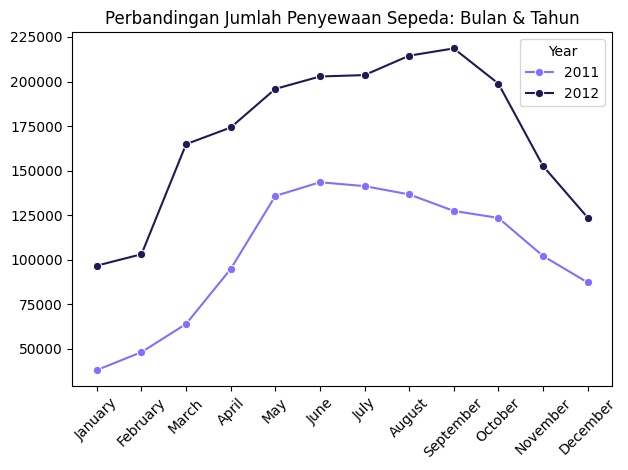

In [22]:
day['month'] = pd.Categorical(day['month'], categories=
    ['January','February','March','April','May','June','July','August','September','October','November','December'],
    ordered=True)

monthly = day.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly,
    x="month",
    y="count",
    hue="year",
    palette={"#836FFF","#211951"},
    marker="o")


plt.title("Perbandingan Jumlah Penyewaan Sepeda: Bulan & Tahun")
plt.xlabel(None)
plt.xticks(rotation=45)
plt.ylabel(None)
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

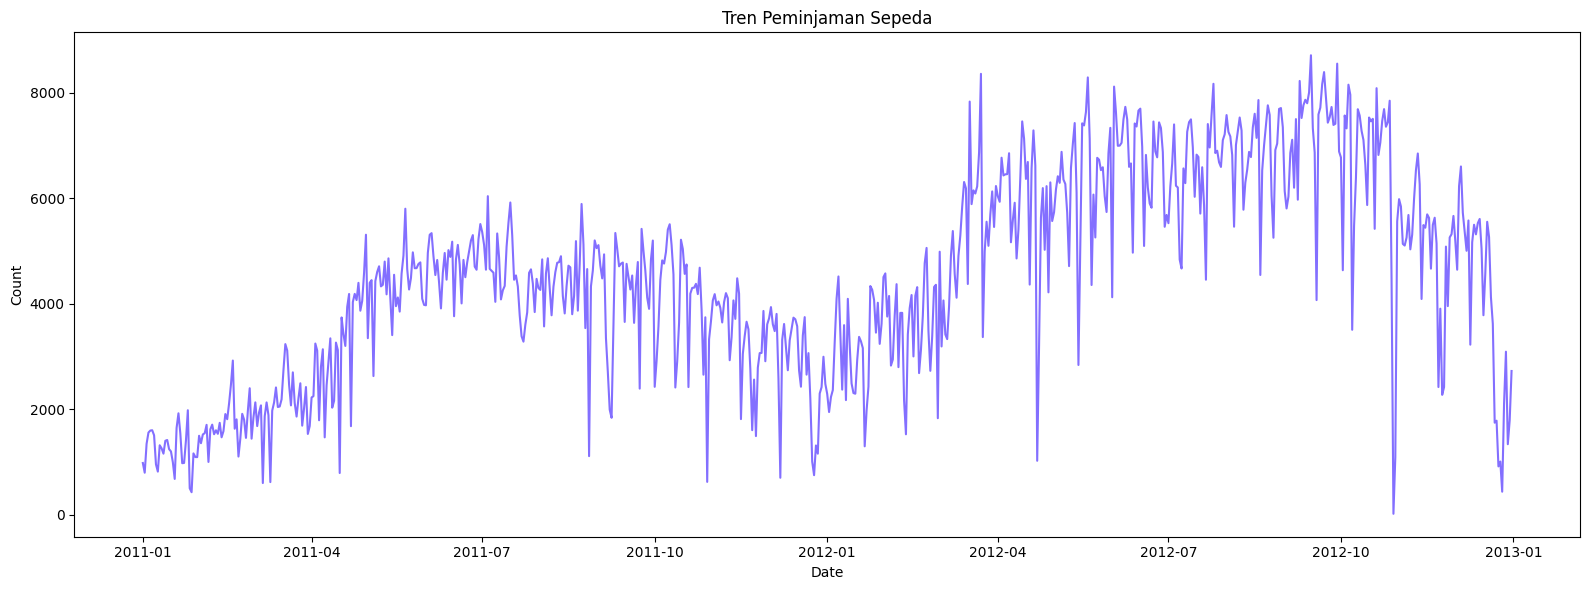

In [23]:
plt.figure(figsize=(16,6))

sns.lineplot(x="daydate", y="count", data=day, color='#836FFF')

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Tren Peminjaman Sepeda")

plt.tight_layout()
plt.show()


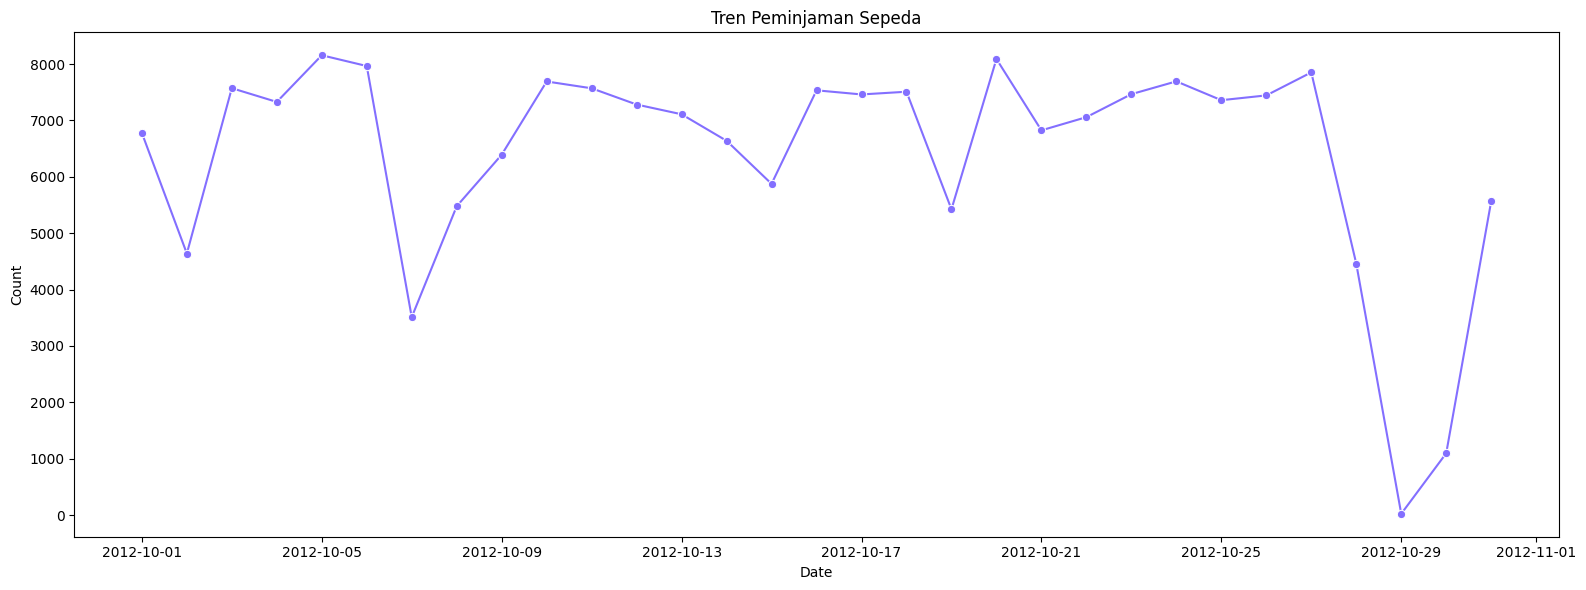

In [24]:
filtered_data = day[(day['daydate'].dt.year == 2012) & (day['daydate'].dt.month == 10)]
plt.figure(figsize=(16,6))
sns.lineplot(x="daydate", y="count", data=filtered_data, color='#836FFF', marker='o')

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Tren Peminjaman Sepeda")

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca cerah hingga buruk memengaruhi jumlah orang dalam meminjam sepeda?

C:\Users\USER\AppData\Local\Temp\ipykernel_14380\2216902313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


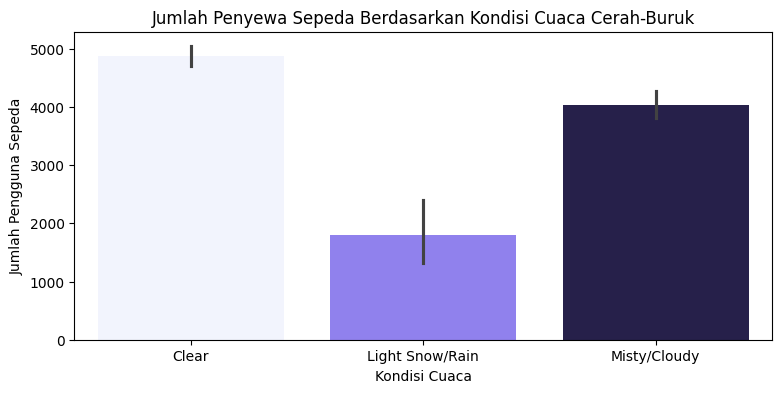

In [25]:
plt.figure(figsize=(9,4))
warna = ["#F0F3FF", "#836FFF", "#211951"]

sns.barplot(
    x='weathercondition',
    y='count',
    data=day,
    palette=warna)


plt.title('Jumlah Penyewa Sepeda Berdasarkan Kondisi Cuaca Cerah-Buruk')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


### Pertanyaan 3: Apakah perbedaan musim memberikan pengaruh yang signifikan terhadap peminjam sepeda ditinjau dari casual customer dan registered customer?

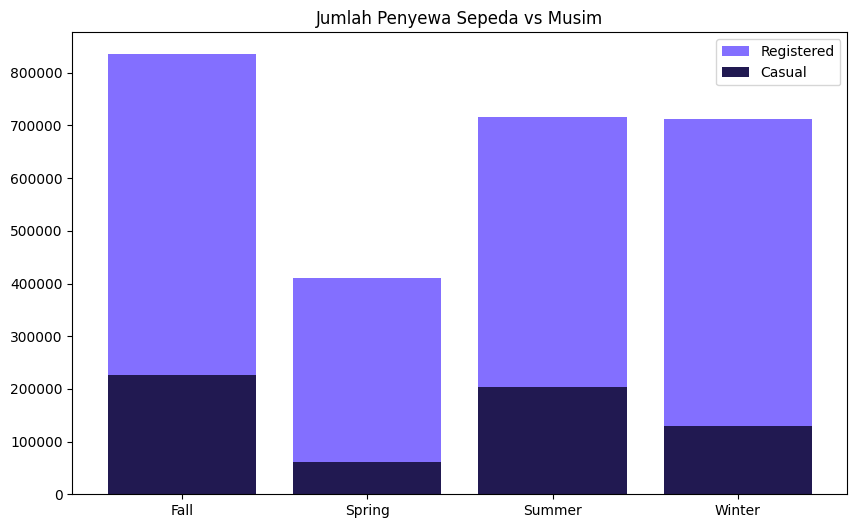

In [26]:
plt.figure(figsize=(10, 6))
seasonal = day.groupby('season')[['registered', 'casual']].sum().reset_index()
warna_register = "#836FFF"
warna_casual = "#211951"

plt.bar(
    seasonal ['season'],
    seasonal ['registered'],
    label='Registered',
    color= warna_register)

plt.bar(
    seasonal ['season'],
    seasonal ['casual'],
    label='Casual',
    color=warna_casual
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah Penyewa Sepeda vs Musim')
plt.legend()
plt.show()
     

### Pertanyaan 4: Apakah terdapat korelasi antara suhu dan jumlah orang yang melakukan peminjaman sepeda ditinjau dari casual customer dan registered customer?

Text(0.5, 1.0, 'Temperature vs Count')

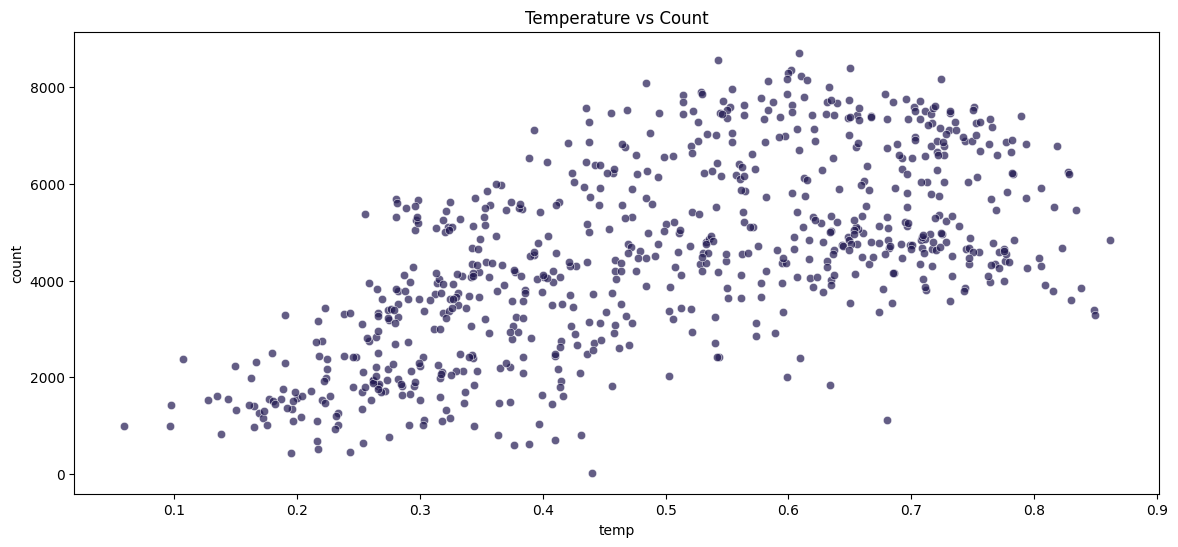

In [31]:
plt.figure(figsize=(14, 6))
warna = "#211951"
sns.scatterplot(
    x='temp',
    y='count',
    data=day,
    alpha=0.7,
    color=warna
)
plt.title('Temperature vs Count')

## Conclusion

#### Kesimpulan Pertanyaan 1:
Tren peminjaman sepeda menunjukkan peningkatan yang signifikan dari tahun 2011 ke 2012, baik secara keseluruhan maupun pada setiap bulannya. Jumlah peminjaman pada tahun 2012 secara konsisten lebih tinggi daripada tahun sebelumnya. Namun, perlu dicatat bahwa terdapat anomali pada tanggal 29 Oktober 2012 dimana tidak ada peminjaman sepeda, yang dapat dikaitkan dengan kejadian badai Hurricane Sandy.

#### Kesimpulan Pertanyaan 2:
Ada korelasi yang kuat antara kondisi cuaca dan jumlah peminjaman sepeda. Penyewa sepeda cenderung memilih untuk melakukan peminjaman saat cuaca cerah, diikuti oleh kondisi berawan atau berkabut. Sebaliknya, peminjaman sepeda cenderung rendah saat terjadi hujan ringan atau salju ringan.

#### Kesimpulan Pertanyaan 3:
Pola peminjaman sepeda bervariasi berdasarkan musimnya, dengan jumlah peminjaman terendah terjadi pada musim panas dan tertinggi pada musim gugur. Hal ini menunjukkan bahwa faktor-faktor selain musim juga memengaruhi jumlah peminjaman, karena bahkan selama musim dingin masih terdapat jumlah peminjaman yang signifikan.

#### Kesimpulan Pertanyaan 4:
Terdapat korelasi positif antara suhu dan jumlah peminjaman sepeda, yang terlihat dari pola persebaran data yang cenderung naik ke arah kanan atas pada grafik. Artinya, ketika suhu meningkat, jumlah peminjaman sepeda juga cenderung meningkat. Ini menunjukkan bahwa suhu memainkan peran penting dalam menentukan tingkat minat masyarakat untuk melakukan peminjaman sepeda.